# <center> Trabalho de Processamento e Análise de Imagens Digitais
## <center> Trabalho 1: Amostragem e Quantização

### <center> André Freitas
### <center> Artur Rodrigues

#### Estudar o efeito da quantização e da amostragem em imagens digitais. (Cap. 2.4 livro Digital Image Processing Rafael C. Gonzalez)

#### A imagem utilizada: lenna.jpg

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

A imagem que será utilizada nos exemplos é a lenna.jpg. Trata-se de uma imagem de 512 por 512 pixels, com 256 tons de cinza. Abaixo a imagem como se encontra originalmente.

Resolução da imagem original: (512, 512)


 Figura 1


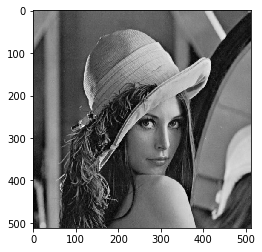

In [3]:
img = mpimg.imread('lenna.jpg') # read image from file to array
print('Resolução da imagem original:' ,img.shape)
# fig = plt.figure(figsize=(5,5))
imgplot = plt.imshow(img, cmap='gray')
print('\n\n Figura 1')
plt.show()



Utilizando a função Ravel() disponível na biblioteca Matplotlib.image, podemos transformar a matriz que representa a imagem em um vetor, para então obter uma representação do seu histograma. A função calcHist() está disponível na biblioteca OpenCV para python.

Tamanho do vetor obtido: 262144
Níveis de cinza: 256


 Figura 2


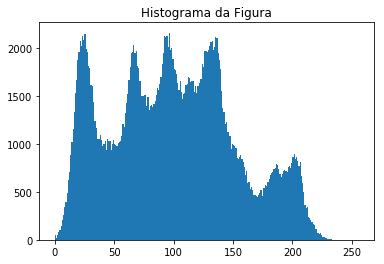

In [4]:
hist = cv2.calcHist([img],[0],None,[256], [0,256] )
img_vec = img.ravel() 
print('Tamanho do vetor obtido:', img_vec.size)
print('Níveis de cinza:', hist.size)
plt.hist(img_vec, 256,[0,256]);

plt.title('Histograma da Figura')
print('\n\n Figura 2')
plt.show()


#### Quantização e Amostragem

Iremos agora mostrar o efeito da amostragem e da quantização nesta imagem. Uma imagem $f$ pode ser uma função contínua com relação às coordenadas x e y, e também com relação à amplitude (valor das coordenadas). Uma imagem digital trata-se de uma imagem que foi amostrada e quantizada a partir de uma imagem $f$ contínua. Digitalizar uma imagem $f$ com relação às coordenadas é chamado de amostrar ou $\textit sampling$. Digitalizar com relação à amplitude é chamado quantizar ou $ \textit quantization $.
Tomando como base o vector obtido a partir da imagem podemos aplicar a técnica da amostragem de forma direta, tomando amostras igualmente espaçadas do vetor, e descartando aquelas amostrar que não forma selecionadas. Ao final obteremos um vetor reduzido de amostras para montar a imagem.

In [5]:
# Exibe os 30 primeiros pixels 
px = img_vec[1:30]
print ('saida 1: ' , px)
img_vec2 = px[::2] # Amostra 1 em cada 2 pixels (subamostragem)
print ('saida 2: ' , img_vec2[1:30])

saida 1:  [137 138 137 134 133 134 136 143 136 134 134 132 137 137 126 132 136 139
 137 131 129 131 134 132 134 128 126 131 130]
saida 2:  [137 133 136 136 134 137 126 136 137 129 134 134 126 130]


Vemos que de um vetor de 30 posições, ao ser amostrado em espaçamentos de 2, obtemos como resultado um vetor de 14 posições. Podemos fazer isso diretamente na matriz, amostrando nas duas dimensões:

A resolução da imagem amostrada está acima de cada imagem:


 Figura 3


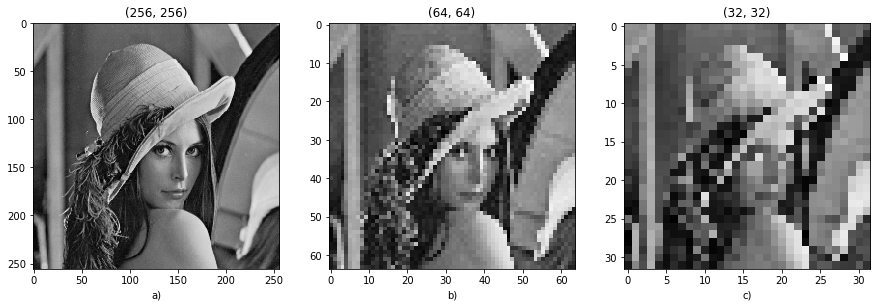

In [6]:
plt.figure(figsize=(15,15))

img2 = img[::2,::2]
print('A resolução da imagem amostrada está acima de cada imagem:')
print('\n\n Figura 3')
plt.subplot(1,3,1)
plt.imshow(img2, cmap='gray')
plt.title( img2.shape)
plt.xlabel('a)')

img2 = img[::8,::8]
plt.subplot(1,3,2)
plt.imshow(img2, cmap='gray')
plt.title( img2.shape)
plt.xlabel('b)')

img2 = img[::16,::16]
plt.subplot(1,3,3)
plt.imshow(img2, cmap='gray')
plt.title( img2.shape)
plt.xlabel('c)');



A quantização está relacionada ao nível de intensidade atribuido a cada pixel, sendo que neste caso a imagem lenna.jpg tem 256 níveis 
de cinza. Podemos fazer algumas modificações nesta imagem reduzindo este número de níveis, sendo por tanto necessário uma decisão 
para associar cada píxel a um novo valor de intensidade dentro deste reduzido conjunto de níveis.

No experimento anterior, a imagem original que foi amostrada com 512 pixels de resolução (pelo sensor optico ou processamento incial) foi manipulada para que sua nova resolução fosse mais baixa, ou seja, foi aplicado uma subamostragem. A imagem resultante claramente é pior que a original devido à quantidade de informação que foi removida. Quanto mais informação removida menor será a qualidade da imagem. 

Modificaremos agora os níveis de cinza para demonstrar o efeito da quantização na imagem original de 512 pixels de resolução. Definimos uma função que normaliza uma matriz dentro dos níveis definidos, fazendo o papel de quantizador. Ou seja, pegamos uma imagem e decidimos para cada pixel qual ton de cinza ele pertence por arredondamento. O primeiro teste é para dois tons, ou seja, branco e preto. Sendo assim, qualquer pixel que seja diferente de branco, será preto. 

In [7]:
# metodo de quantização 1 utilizando arredondamento e posterior mapeamento em mapa de cores cinza (cmap = 'gray')
def q (mtx, n):
    nivel = mtx.shape[1]/n
    q = mtx * 1/ np.float32(nivel)
    return np.around(q,0)



 Figura 4


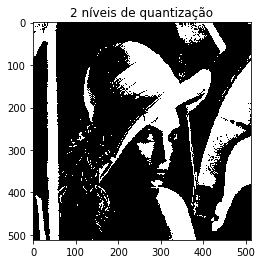

In [8]:
print('\n\n Figura 4')
plt.imshow(q(img, 2), cmap='gray');
plt.title('2 níveis de quantização');

Níveis de quantização:



 Figura 5


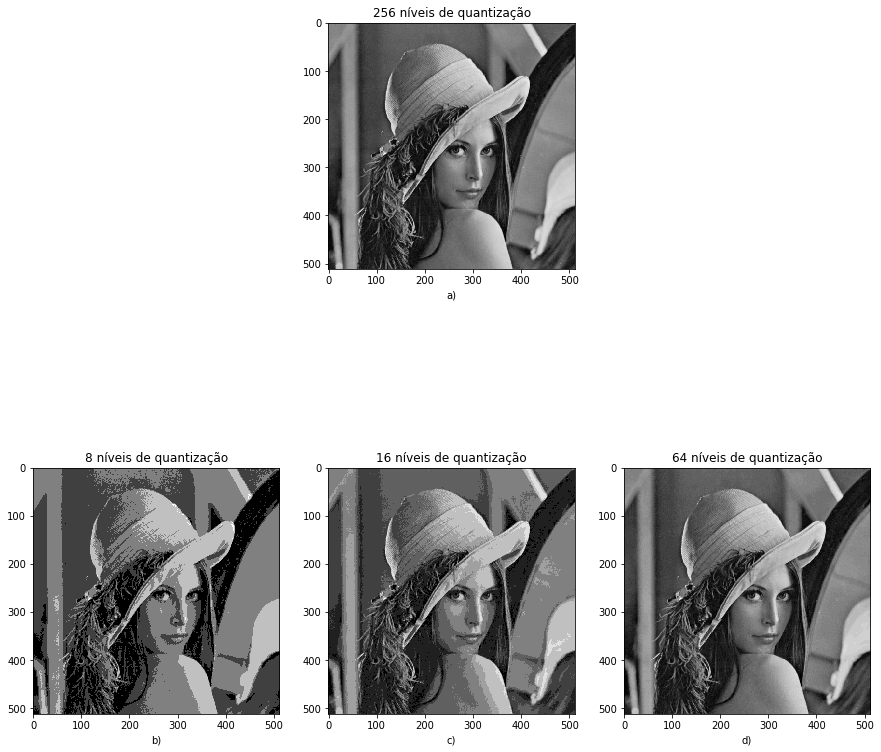

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(2,3,2)
plt.imshow(q(img, 256), cmap='gray');
plt.title('256 níveis de quantização');
plt.xlabel('a)');

plt.subplot(2,3,4)
plt.imshow(q(img, 8), cmap='gray');
plt.title('8 níveis de quantização');
plt.xlabel('b)');

plt.subplot(2,3,5)
plt.imshow(q(img, 16), cmap='gray');
plt.title('16 níveis de quantização');
plt.xlabel('c)');

plt.subplot(2,3,6)
plt.imshow(q(img, 64), cmap='gray');
plt.title('64 níveis de quantização');
plt.xlabel('d)');

print('\n\n Figura 5')

Dos exemplos acima percebemos que a qualidade da imagem está diretamente relacionada com o número de amostras e os níveis de quantização: quanto maior, melhor. Pela imagem da Figura 5 c) percebemos que 64 níveis de quantização já demonstram uma qualidade boa de imagem a olho nú. Contudo o conteúdo da imagem é um importante fator nesta escolha, imagens em tons de cinza sofrem mais que imagens coloridas com relação à quantização.

In [10]:
# método de quantização 2 utilizando indices para substituição de valores. não necessita definir cmap.
def qtz (mtx, n):
    val = list(range( 256))
    val = val[::round(256/n)] #bins
   
    val2 = np.digitize(mtx, val)
    val3 = np.zeros((mtx.shape[1],mtx.shape[1]))
   
    qu =  np.zeros((512,512))
    for i in range(0,mtx.shape[1]):
        for j in range (0, mtx.shape[1]):
                           a = val[val2[i][j]-1]
                           val3[i,j] = a
    return np.int64(val3)

Abaixo vemos os efeitos de uma mesma quantização aplicada na imagem colorida e na imagem em escala de cinza.
Embora sejam imagens diferentes podemos perceber uma qualidade natural na imagem colorida.



 Figura 6


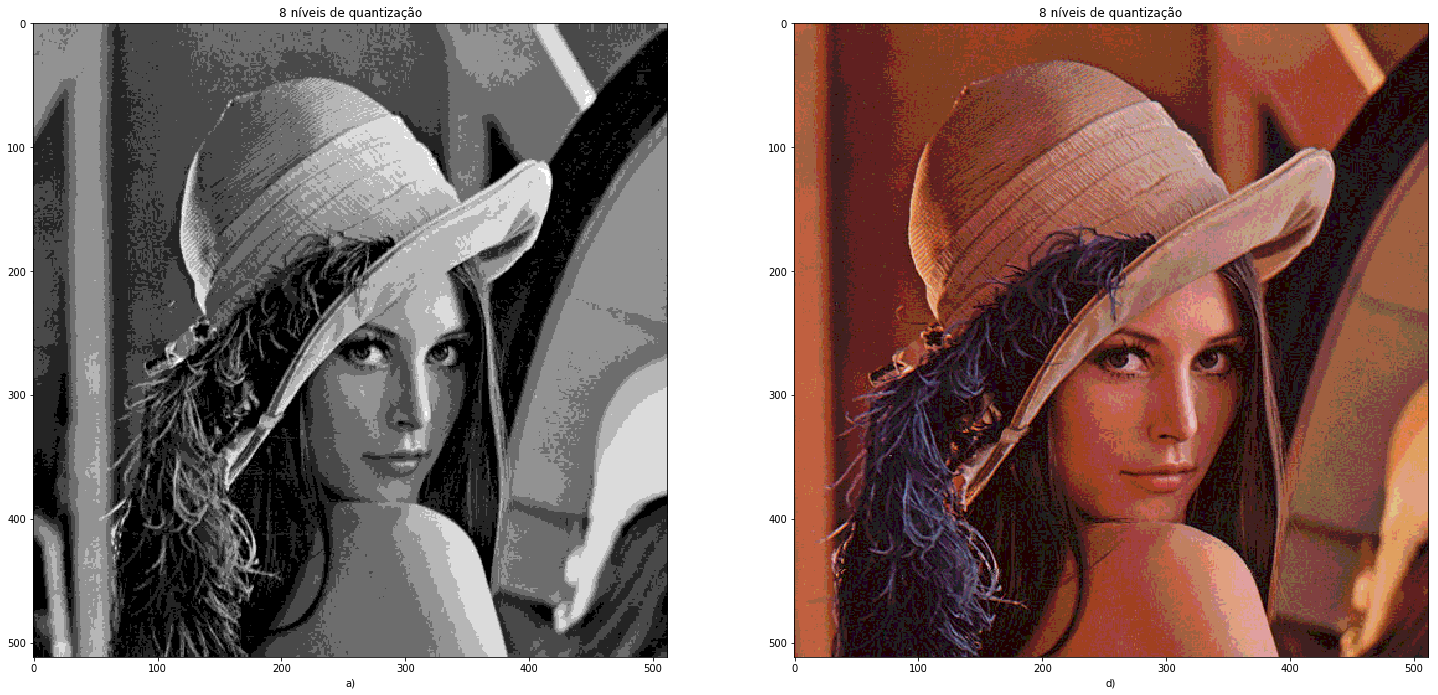

In [12]:
plt.figure(figsize=(25,25))

nn=8 # niveis de quantização para figura rgb
imgc = cv2.imread("lenna_color.jpg",3)
b,g,r = cv2.split(imgc)           # get b, g, r
#print (b)

bb = qtz(b,nn); rr = qtz(r,nn); gg = qtz(g,nn);
rgb_img1 = cv2.merge([rr,gg,bb])     # switch it to r, g, b
#print (bb.max())
plt.subplot(1,2,1)
plt.imshow(qtz(img, nn), cmap='gray');
plt.title('8 níveis de quantização');
plt.xlabel('a)');

plt.subplot(1,2,2)
#plt.imshow(q(imgc, 64));

#plt.subplot(1,2,2)
plt.imshow(rgb_img1)

plt.title('8 níveis de quantização');
plt.xlabel('d)');
print('\n\n Figura 6')

# Referências
Digital Image Processing 3th Ed. Rafale C. Gonzalez. 2008 Editora Pearson.